# Data challenge
## ITpS postdoc recruitment
This is the scirpt from the challenge of data analysis & visualization.


### Questions

1. Genomic surveillance in Brazil has improved over the past months of COVID-19 pandemic. Using the
dataset described above, show us how many daily SARS-CoV-2 samples were sequenced in Brazil, from
March 1st , 2020 to December 31 st, 2021. How well genome sequencing developed in 2020 and in 2021?
2. Dozens (likely hundreds) of SARS-CoV-2 lineages circulated in Brazil during the current COVID-19
pandemic. Some of these lineages were classified as “variants of concern” (VOC) by the WHO. As in most
countries, once a new VOC is introduced in Brazil, it may replace the circulating viruses, becoming dominant.
Using the same dataset provided above, how was the distribution of the different variants (Alpha, Beta,
Gamma, Delta, and Omicron) in the Brazilian states?
3. The data provided can be visualized in many ways, and this visual vocabulary illustrates alternative
visualizations. Using the same dataset, explore your creativity, and provide answers to new questions not yet
considered in the previous tasks.

#### Libraries


In [26]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px

#### Metadata of variants from Brazil

In [27]:
df = pd.read_csv(r"C:\Users\bragatte\Documents\github\ITpS\metadata_brazil_variants.tsv", sep='\t') #win
#df = pd.read_csv("/home/bragatte/Documentos/GitHub/ITpS/metadata_brazil_variants.tsv", sep='\t') #linux/mac
df.head()

,identifier,date,pango_lineage,variant,country,state,state_code,ibge_code,age,sex,lat,long
0,f13d424ea9d922139c0fdf8248983cb7bf70ab12,2020-03-01,B.1.1.33,Other variants,Brazil,Rio de Janeiro,RJ,BR33,?,?,-22.911014,-43.209373
1,1b036bc8f04309aeae963ff7350b0f5253595e76,2020-03-01,B.1.1,Other variants,Brazil,Rio Grande do Sul,RS,BR43,53,Male,-29.842528,-53.768058
2,d7159e22a06c290aedfd0c51f036e81f60dd2210,2020-03-01,B.1.1,Other variants,Brazil,Rio Grande do Sul,RS,BR43,47,Female,-29.842528,-53.768058
3,98b49cb92dc2516a6b061f16c27b3a12e9404885,2020-03-01,B.1,Other variants,Brazil,Rio Grande do Sul,RS,BR43,82,Male,-29.842528,-53.768058
4,a5ced01b07bfa9705841a45c5b236be5590e7fd1,2020-03-04,B,Other variants,Brazil,Distrito Federal,DF,BR53,52,Female,-15.775446,-47.797089


In [28]:
# exploring dataset
df.shape

print('The dataset has {} lines and {} columns'.format(df.shape[0], df.shape[1]))

The dataset has 92598 lines and 12 columns


In [29]:
#Columns headers
df.columns

Index(['identifier', 'date', 'pango_lineage', 'variant', 'country', 'state',
       'state_code', 'ibge_code', 'age', 'sex', 'lat', 'long'],
      dtype='object')

### 1. Genomic surveillance in Brazil
* How many daily SARS-CoV-2 samples were sequenced in Brazil, from **March 1st, 2020 to December 31st, 2021**?

In [30]:
df.columns

print('The columns to explore for the first question are {} and {}'.format(df.columns[1], df.columns[4]))

The columns to explore for the first question are date and country


In [31]:
#checking the samples intervals
df.groupby('country')['date'].agg([('Start_Date', 'min'), ('End_Date', 'max')])

,Start_Date,End_Date
country,,
Brazil,2020-03-01,2021-12-30


In [32]:
# Are any duplicated samples?
df.duplicated('identifier').sum()

0

In [33]:
# The non duplicated samples
(~df.duplicated()).sum()

92598

In [34]:
# Considering every identifier is unique, sum the values from the days gives the final number of genomic sequences in the period.
df['date'].value_counts().sort_index().sum()

92598

In [35]:
#cehcking the samples by date
daily_sars = df['date'].value_counts().sort_index()
daily_sars

2020-03-01     4
2020-03-04     6
2020-03-05     3
2020-03-06     3
2020-03-08     4
              ..
2021-12-26    12
2021-12-27    32
2021-12-28    35
2021-12-29     5
2021-12-30     1
Name: date, Length: 667, dtype: int64

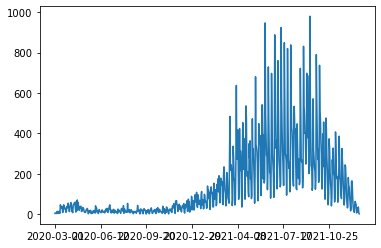

In [36]:
daily_sars.plot();

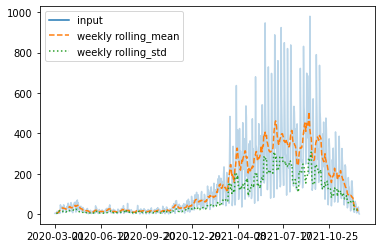

In [37]:
rolling = daily_sars.rolling(7, center=True)

data = pd.DataFrame({'input': daily_sars,
                     'weekly rolling_mean': rolling.mean(),
                     'weekly rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

#### How many daily SARS-CoV-2 samples were sequenced in Brazil, from **March 1st, 2020 to December 31st, 2021**?
* In the interval from **March 1st, 2020 to December 31st, 2021** Brazil sequenced 92598 samples of SARS-CoV-2.

---

* How well genome sequencing developed in 2020 and in 2021?

In [38]:
#Check the types for each column
df.dtypes

identifier        object
date              object
pango_lineage     object
variant           object
country           object
state             object
state_code        object
ibge_code         object
age               object
sex               object
lat              float64
long             float64
dtype: object

In [39]:
# convert the 'Date' column to datetime format
df['date']= pd.to_datetime(df['date'])
df.dtypes

identifier               object
date             datetime64[ns]
pango_lineage            object
variant                  object
country                  object
state                    object
state_code               object
ibge_code                object
age                      object
sex                      object
lat                     float64
long                    float64
dtype: object

In [40]:
# creating a column for the years
df['Year'] = df.date.dt.year
df.head()

,identifier,date,pango_lineage,variant,country,state,state_code,ibge_code,age,sex,lat,long,Year
0,f13d424ea9d922139c0fdf8248983cb7bf70ab12,2020-03-01,B.1.1.33,Other variants,Brazil,Rio de Janeiro,RJ,BR33,?,?,-22.911014,-43.209373,2020
1,1b036bc8f04309aeae963ff7350b0f5253595e76,2020-03-01,B.1.1,Other variants,Brazil,Rio Grande do Sul,RS,BR43,53,Male,-29.842528,-53.768058,2020
2,d7159e22a06c290aedfd0c51f036e81f60dd2210,2020-03-01,B.1.1,Other variants,Brazil,Rio Grande do Sul,RS,BR43,47,Female,-29.842528,-53.768058,2020
3,98b49cb92dc2516a6b061f16c27b3a12e9404885,2020-03-01,B.1,Other variants,Brazil,Rio Grande do Sul,RS,BR43,82,Male,-29.842528,-53.768058,2020
4,a5ced01b07bfa9705841a45c5b236be5590e7fd1,2020-03-04,B,Other variants,Brazil,Distrito Federal,DF,BR53,52,Female,-15.775446,-47.797089,2020


In [41]:
#number of events by year. As we already know the dataset has only unique samples
df_year = df.Year.value_counts().sort_index().head()
df_year.head()

2020     6436
2021    86162
Name: Year, dtype: int64

In [42]:
# creating a column for months and days
df['month-day'] = df.date.dt.strftime('%m-%d')

#### How well genome sequencing developed in 2020 and in 2021?
* 2021 has 13 times more genome sequences than 2020.

---

### 2. SARS-CoV-2 lineages circulated in Brazil
* How was the distribution of the different variants (Alpha, Beta, Gamma, Delta, and Omicron) in the Brazilian states?

In [43]:
~(df.duplicated(subset=['pango_lineage', 'state'])).sum()

-91484

In [53]:
#pandas function for create new column with pango_lineage info adding Who labels for (Alpha, Beta, Gamma, Delta, and Omicron)
def categorise(row):  
    if row['pango_lineage'] == 'B.1.1.7':
        return 'Alpha'
    elif row['pango_lineage'] == 'B.1.135':
        return 'Beta'
    elif row['pango_lineage'] == 'P.1':
        return 'Gamma'
    elif row['pango_lineage'] == 'B.1.617.1':
        return 'Kappa'
    elif row['pango_lineage'] == 'B.1.617.2':
        return 'Delta'
    elif row['pango_lineage'] == 'BA.1':
        return 'Omicron'
    elif row['pango_lineage'] == 'BA.2':
        return 'Omicron'
    elif row['pango_lineage'] == 'B.1.427':
        return 'Episilon'
    elif row['pango_lineage'] == 'B.1.429':
        return 'Episilon'
    elif row['pango_lineage'] == 'B.1.525':
        return 'Eta'
    elif row['pango_lineage'] == 'B.1.526':
        return 'Iota'
    elif row['pango_lineage'] == 'C.37':
        return 'Lambda'
    elif row['pango_lineage'] == 'B.1.621':
        return 'Mu'
    return 'VOI'

In [65]:
#numpy for create new column with pango_lineage info adding Who labels for (Alpha, Beta, Gamma, Delta, and Omicron)
df['who_label'] = df.apply(lambda row: categorise(row), axis=1)
df.tail()

,identifier,date,pango_lineage,variant,country,state,state_code,ibge_code,age,sex,lat,long,Year,month-day,who_label
92593,858abbf01e1d950b739ec92c8540aea164119d95,2021-12-29,BA.1,Omicron,Brazil,Pernambuco,PE,BR26,9,Male,-8.411632,-37.59197,2021,12-29,Omicron
92594,fbda02031ff4a163ad92e5be16b6a041a9747238,2021-12-29,BA.1,Omicron,Brazil,Pernambuco,PE,BR26,37,Female,-8.411632,-37.59197,2021,12-29,Omicron
92595,f381bbacba22f7cecd5dc47885d6e0f9b9f91dea,2021-12-29,BA.1,Omicron,Brazil,Pernambuco,PE,BR26,64,Female,-8.411632,-37.59197,2021,12-29,Omicron
92596,ef065e675a53838cfbd28d004386bf8f56ae0c03,2021-12-29,BA.1,Omicron,Brazil,Pernambuco,PE,BR26,43,Male,-8.411632,-37.59197,2021,12-29,Omicron
92597,fe08aec6cee70f8751c54657a1f01341a9ced4c5,2021-12-30,BA.1,Omicron,Brazil,Pernambuco,PE,BR26,26,Female,-8.411632,-37.59197,2021,12-30,Omicron


---

### 3.Explore visualizations     
* Using the [visual-vocabulary from Financial-Times](https://github.com/Financial-Times/chart-doctor/tree/main/visual-vocabulary) explore your creativity, and provide answers to new questions not yet considered in the previous tasks.

---

In [67]:
# save data for BI
df.to_csv('itps_metadata_br.csv', index=False)